# 将六个模型的上图拼成一个完整大图

In [1]:
# -*- coding: utf-8 -*-
# Create time: 2025-11-04
# Update time: 2025-11-15

# conda activate benchmark
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scanpy as sc
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'


In [9]:
def compare_two_models_umap(adata_path1, adata_path2, obs_columns, obs_title, subtitle, figsize, save_path=None):
    """
    比较两个模型的UMAP图
    
    Parameters:
    -----------
    adata_path1, adata_path2 : str
        两个adata的文件路径
    obs_columns : list
        观测列列表，例如 ["cell_type", "donor_id"]
    subtitle : str
        大子图的标题
    figsize : tuple
        图形大小
    save_path : str
        保存路径，如果为None则不保存
    
    Returns:
    --------
    fig : matplotlib figure对象
    """
    
    # 读取数据
    adata1 = sc.read(adata_path1, backed='r')
    adata2 = sc.read(adata_path2, backed='r')

    # 布局参数
    fig = plt.figure(figsize=figsize)
    
    # 创建网格布局
    gs = gridspec.GridSpec(2, 2, figure=fig, 
                          hspace=0, wspace=0)
    
    adatas = [adata1, adata2]
    titles = ["Raw embedding", "Batch-centered embedding"]

    # 绘制UMAP子图
    for col, (adata, title) in enumerate(zip(adatas, titles)):
        for row, col_name in enumerate(obs_columns):
            ax = fig.add_subplot(gs[row, col])

            sc.pl.umap(
                adata,
                color=col_name,
                show=False,
                ax=ax,
                legend_loc=None,
                frameon=False,
                title="",
                s=1
            )
            
            if row == 0:
                ax.set_title(title, fontsize=10)
    
    # 在左侧添加行标签
    fig.text(0.1, 0.7, obs_title[0], ha='left', va='center', rotation=90, fontsize=10)
    fig.text(0.1, 0.3, obs_title[1], ha='left', va='center', rotation=90, fontsize=10)

    # 添加大子图的标题
    fig.text(0.5, 0.98, subtitle, ha='center', va='top', fontsize=15, fontweight='bold')

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches="tight")
        print(f"图片已保存到: {save_path}")
    
    return fig


def combine_umap_figures(config_dict, obs_columns, obs_title, figsize_large=(16, 10), save_path=None):
    """
    将多个UMAP图拼接成一个大图
    
    Parameters:
    -----------
    config_dict : dict
        配置字典，格式为：
        {
            "Liver": {
                "adata_path1": "/path/to/adata1.h5ad",
                "adata_path2": "/path/to/adata2.h5ad"
            },
            "Pancreas": {...},
            ...
        }
    figsize_large : tuple
        大图尺寸
    save_path : str
        保存路径
    """
    from PIL import Image
    import io
    
    # 计算布局：2行4列
    n_figs = len(config_dict)
    n_rows = (n_figs + 3) // 4
    n_cols = 4
    
    fig_combined = plt.figure(figsize=figsize_large)
    gs_main = gridspec.GridSpec(n_rows, n_cols, figure=fig_combined, 
                                hspace=0, wspace=0)
    
    for idx, (subtitle, paths) in enumerate(config_dict.items()):
        row = idx // n_cols
        col = idx % n_cols
        
        # 生成单个UMAP图
        fig = compare_two_models_umap(
            adata_path1=paths["adata_path1"],
            adata_path2=paths["adata_path2"],
            obs_columns=obs_columns,
            obs_title=obs_title,
            subtitle=subtitle,
            figsize=(5, 5),
            save_path=None
        )
        
        # 将原图保存为临时图像
        buf = io.BytesIO()
        fig.savefig(buf, format='png', dpi=600, bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)
        
        # 创建新的subplot并显示图像
        ax = fig_combined.add_subplot(gs_main[row, col])
        ax.imshow(img)
        ax.axis('off')
        
        buf.close()
        plt.close(fig)  # 释放内存
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches="tight")
        print(f"拼接图已保存到: {save_path}")
    
    plt.show()
    return None

/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


拼接图已保存到: /home/wanglinting/scFM/Result/figure/liver/umap_all_batch_normalize.jpg


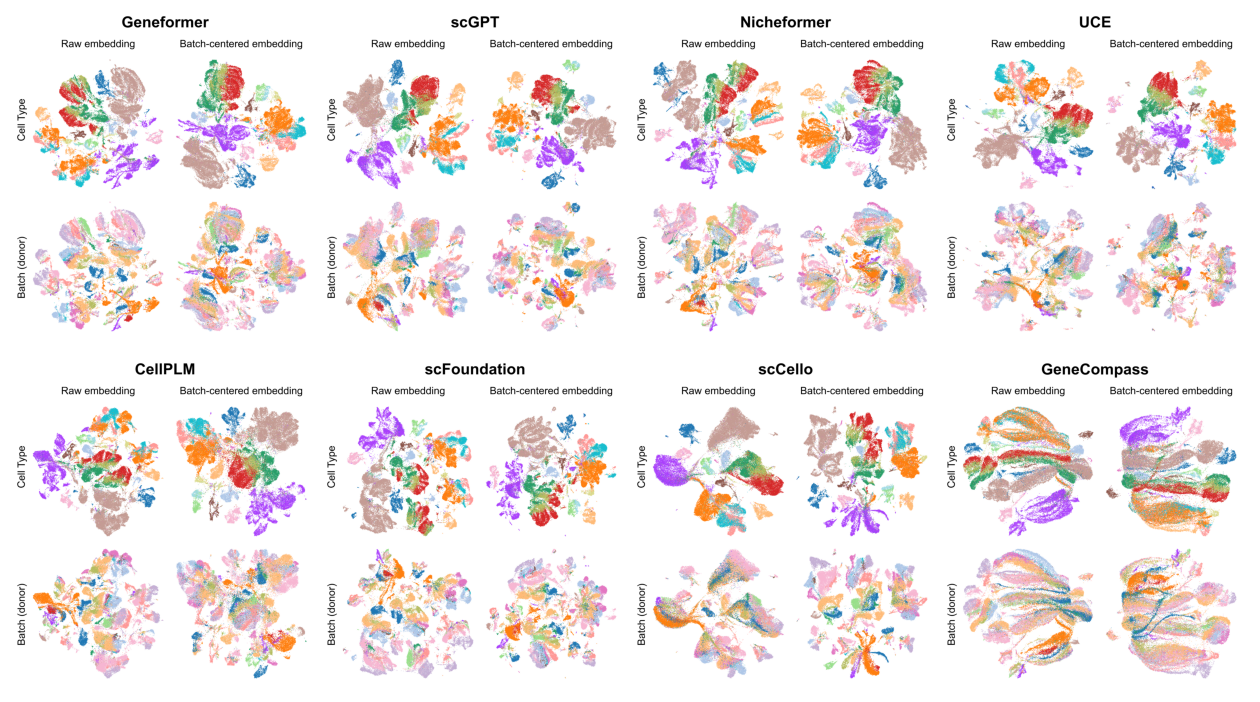

In [10]:
obs_columns = ["cell_type", "donor_id"]
obs_title = ["Cell Type", "Batch (donor)"]

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/uce/Embeddings_uce.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/sccello/Embeddings_sccello.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": "/home/wanglinting/scFM/Result/liver/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": "/home/wanglinting/scFM/Result/liver_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path="/home/wanglinting/scFM/Result/figure/liver/umap_all_batch_normalize.jpg")

拼接图已保存到: /home/wanglinting/scFM/Result/figure/HLCA_assay/umap_all_batch_normalize.jpg


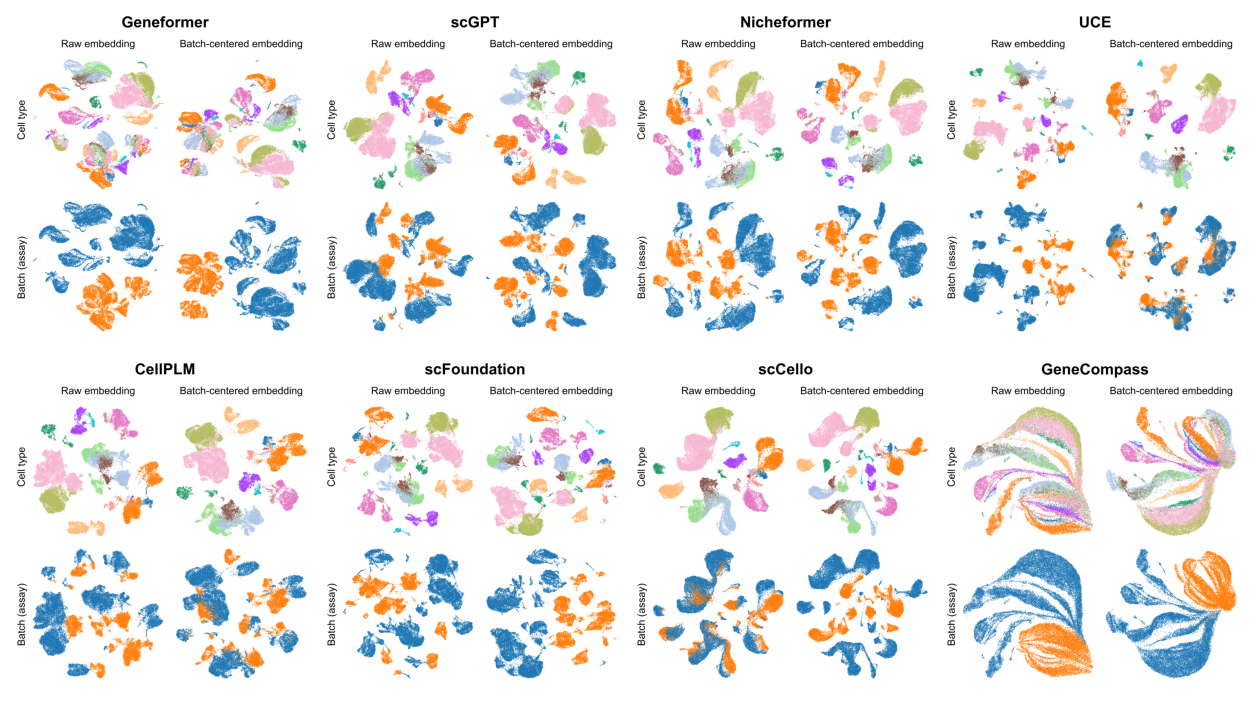

In [11]:
obs_columns = ['final_annotation', 'assay']
obs_title = ['Cell type', 'Batch (assay)']
dataset_name = "HLCA_assay"

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/uce/Embeddings_uce.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/sccello/Embeddings_sccello.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path=f"/home/wanglinting/scFM/Result/figure/{dataset_name}/umap_all_batch_normalize.jpg")

拼接图已保存到: /home/wanglinting/scFM/Result/figure/HLCA_disease/umap_all_batch_normalize.jpg


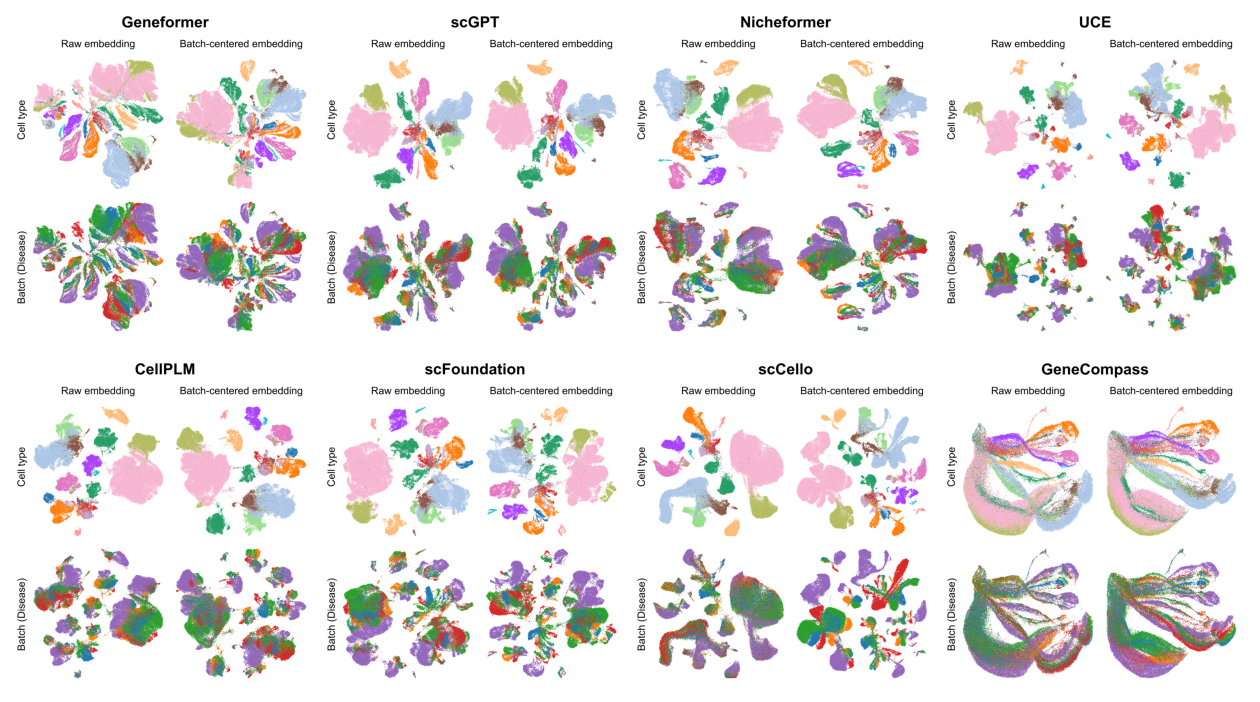

In [12]:
obs_columns =  ['final_annotation', 'disease']
obs_title = ['Cell type', 'Batch (Disease)']
dataset_name = "HLCA_disease"

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/uce/Embeddings_uce.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/sccello/Embeddings_sccello.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path=f"/home/wanglinting/scFM/Result/figure/{dataset_name}/umap_all_batch_normalize.jpg")

拼接图已保存到: /home/wanglinting/scFM/Result/figure/HLCA_sn/umap_all_batch_normalize.jpg


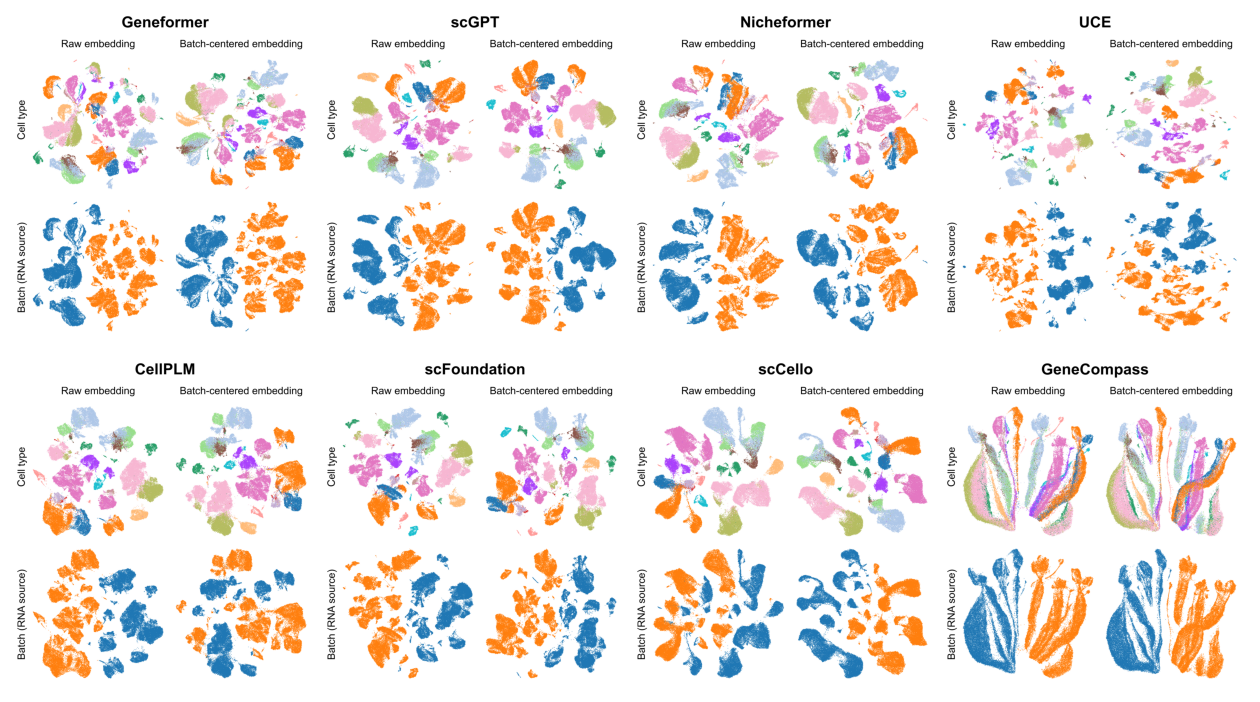

In [13]:
obs_columns = ['final_annotation', 'suspension_type']
obs_title = ['Cell type', 'Batch (RNA source)']
dataset_name = "HLCA_sn"

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/uce/Embeddings_uce.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/sccello/Embeddings_sccello.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path=f"/home/wanglinting/scFM/Result/figure/{dataset_name}/umap_all_batch_normalize.jpg")

/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


拼接图已保存到: /home/wanglinting/scFM/Result/figure/Immune/umap_all_batch_normalize.jpg


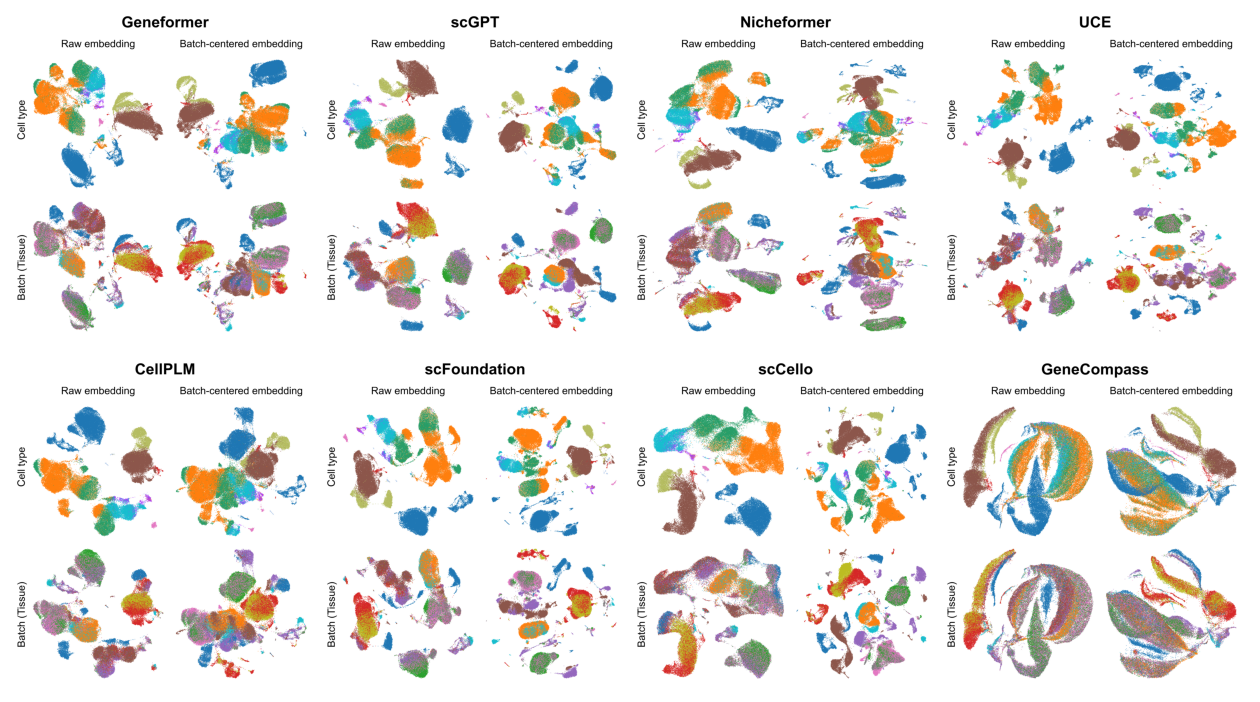

In [14]:

obs_columns = ['cell_type_level_2', 'tissue']
obs_title = ['Cell type', 'Batch (Tissue)']
dataset_name = "Immune"

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/uce/Embeddings_uce.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/sccello/Embeddings_sccello.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path=f"/home/wanglinting/scFM/Result/figure/{dataset_name}/umap_all_batch_normalize.jpg")



拼接图已保存到: /home/wanglinting/scFM/Result/figure/limb/umap_all_batch_normalize.jpg


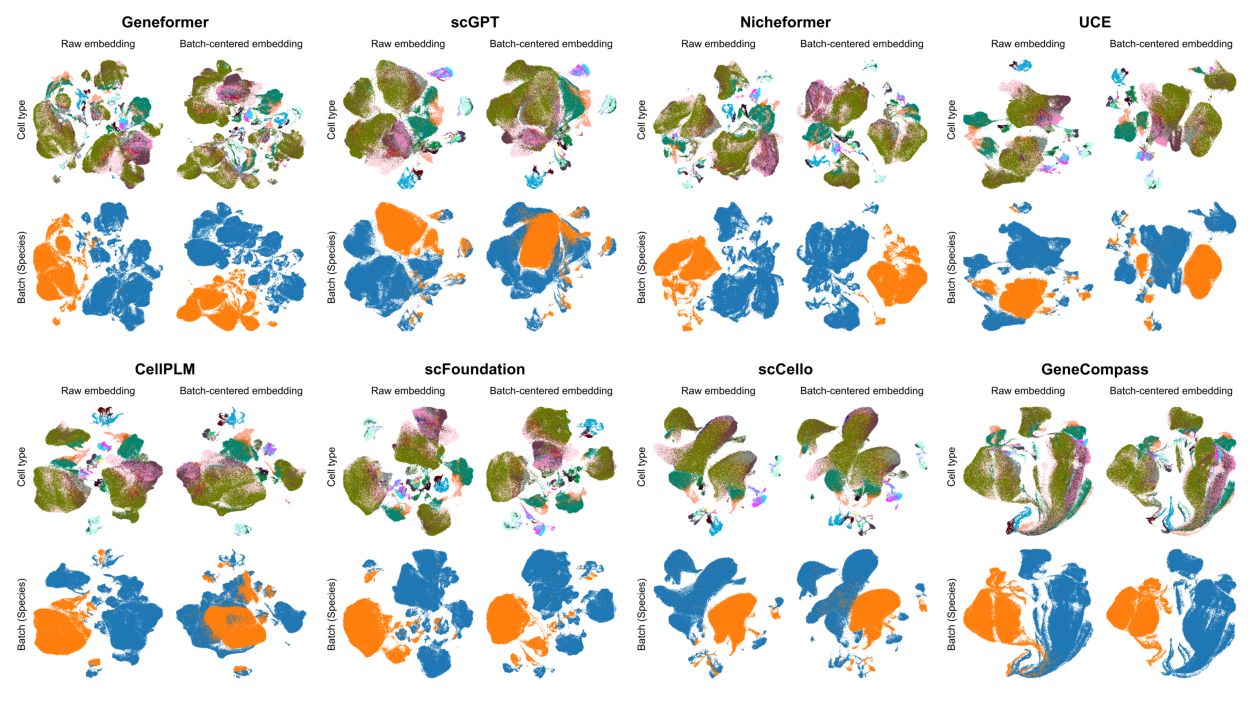

In [15]:
obs_columns = ['cell_type', 'organism']
obs_title = ['Cell type', 'Batch (Species)']
dataset_name = "limb"

# 定义配置字典
config_dict = {
    "Geneformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/geneformer/Embeddings_geneformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
    },
    "scGPT": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scgpt/Embeddings_scgpt.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scgpt/Embeddings_scgpt.h5ad"
    },
    "Nicheformer": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/nicheformer/Embeddings_nicheformer.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/nicheformer/Embeddings_nicheformer.h5ad"
    },
    "UCE": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/uce/Embeddings_uce.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/uce/Embeddings_uce.h5ad"
    },
    "CellPLM": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/cellplm/Embeddings_cellplm.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/cellplm/Embeddings_cellplm.h5ad"
    },
    "scFoundation": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/scfoundation/Embeddings_scfoundation.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/scfoundation/Embeddings_scfoundation.h5ad"
    },
    "scCello": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/sccello/Embeddings_sccello.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/sccello/Embeddings_sccello.h5ad"
    },
    "GeneCompass": {
        "adata_path1": f"/home/wanglinting/scFM/Result/{dataset_name}/genecompass/Embeddings_genecompass.h5ad",
        "adata_path2": f"/home/wanglinting/scFM/Result/{dataset_name}_batch_normalize/genecompass/Embeddings_genecompass.h5ad"
    },
}

# 拼接成大图
combine_umap_figures(config_dict,
                    obs_columns=obs_columns,
                    obs_title=obs_title,
                    figsize_large=(16, 9),
                    save_path=f"/home/wanglinting/scFM/Result/figure/{dataset_name}/umap_all_batch_normalize.jpg")

